In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("~/Desktop/datasets/cleaned_dataset.csv")
data = data.drop(columns=['Country', 'Status'])

#plt.scatter(data_2009["Adult Mortality"], data_2009["Life expectancy "], label = "scatter plot")
#plt.xlabel("adult mortality in 2009")
#plt.ylabel("life expectancy in 2009")'''


1.Correlation Heatmap

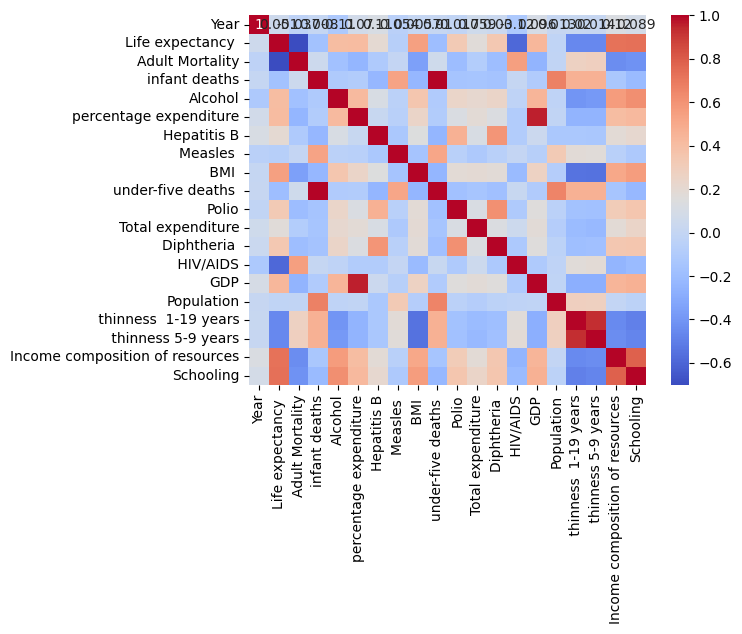

In [9]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

from the correlation heatmap we can conclude that Life expectancy is :

1.positively correlated with : (schooling, Income compostion of ressources, GDP, BMI)

2.negatively correlated with : (Adult Mortality, HIV/AIDS, thinness 1-19 years, thinness 5-9 years)

In [8]:
#linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Extract the features (X) and target variable (Y)
X = data_2009["Adult Mortality"]
y = data_2009['Life expectancy ']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)
print(y_pred)
# Plot the data points and the linear regression line
'''plt.scatter(X, y, label='Data')
plt.plot(X.reshape(-1, 1), y_pred.reshape(1, -1), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()'''



ValueError: Expected 2D array, got 1D array instead:
array=[281.  91. 123. 369. 126. 137.  66.  77. 132. 144. 226.  85. 184. 259.
 232.  97. 393. 157. 152. 283. 338. 124. 195. 373.  72. 453.  91.  93.
 251.  96. 279. 157. 137. 311. 156. 274.  88. 133.  79. 271.  78. 198.
 297. 288. 218. 157. 189. 148.  63.  61. 142. 118. 235. 317. 184.  95.
 566. 277. 192.  76. 254. 491. 131.  75. 276.  63. 215. 166. 235. 117.
 116. 211. 183. 163. 263. 376. 175. 127. 288. 155. 219. 136. 158. 261.
 288. 172. 219. 131. 182. 433. 192. 449.  66. 183. 196. 174. 165. 336.
 147. 183. 118. 215. 378. 231. 118. 183. 149. 368. 587.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.